<div align="center">
    <h1>¡PROYECTO EDA!</h1>
</div>

<div style="text-align: center;">
    <b>ESTACIÓN DE TRATAMIENTO DE AGUA RESIDUAL</b>
</div>

<div style="text-align: center;">
    <img src= "data/MINI.jpg" width="40%">
</div>

**Importamos paquetes**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

1. **Importamos base de datos**

Este conjunto de datos ofrece los volúmenes de agua regenerada, expresadas en metros cúbicos (m3), en cada una de las plantas regeneradoras de agua residual de la ciudad de Madrid (Viveros de la Villa, La China, La Gavia y Rejas), según las medidas oficiales obtenidas para periodos de quince días.

https://datos.gob.es/es/catalogo/l01280796-volumen-de-agua-regenerada-en-las-plantas-regeneradoras-de-agua-residual1

In [47]:
# Cargar el archivo CSV
df = pd.read_csv("./data/agua2018.csv")
# Mostrar las primeras filas del dataframe para entender su estructura
df.head()

,,,,,,,,,,,,,,,,,,,,,,,,ERAR;ene-01;ene-02;feb-01;feb-02;mar-01;mar-02;abr-01;abr-02;may-01;may-02;jun-01;jun-02;jul-01;jul-02;ago-01;ago-02;sep-01;sep-02;oct-01;oct-02;nov-01;nov-02;dic-01;dic-02
VIVEROS;8.582,00;6.522,00;2.767,00;15.058,00;2.741,00;2.097,00;14.583,00;44.373,00;88.037,00;95.240,00;33.705,00;200.547,00;162.691,00;201.039,00;184.071,00;171.628,00;122.840,00;108.463,00;55.008,00;7.461,00;3.062,00;1.864,00;9.113,00;2.793,0.0
LA CHINA;19.360,00;36.751,00;26.513,00;34.709,00;26.793,00;31.262,00;36.064,00;38.902,00;56.668,00;92.229,00;131.861,00;171.172,00;169.734,00;185.947,00;170.123,00;163.286,00;121.843,00;90.472,00;84.379,00;19.179,00;7.914,00;6.598,00;9.658,00;10.615,0.0
LA GAVIA;11.082,00;13.411,00;11.412,00;11.354,00;15.609,00;13.356,00;17.040,00;19.482,00;23.190,00;26.493,00;24.613,00;36.719,00;49.239,00;57.869,00;49.193,00;51.840,00;41.790,00;35.462,00;40.372,00;20.860,00;13.834,00;13.036,00;21.382,00;11.826,0.0
LAS REJAS;21.696,00;28.537,00;44.205,00;33.389,00;25.732,00;31.704,00;43.839,00;80.951,00;104.277,00;93.216,00;68.318,00;196.806,00;200.839,00;224.545,00;221.463,00;226.053,00;158.968,00;152.438,00;92.716,00;36.616,00;25.105,00;21.192,00;20.627,00;18.982,0.0
TOTAL;60.720,00;85.221,00;84.897,00;94.510,00;70.875,00;78.419,00;111.526,00;183.708,00;272.172,00;307.178,00;258.497,00;605.244,00;582.503,00;669.400,00;624.850,00;612.807,00;445.441,00;386.835,00;272.475,00;84.116,00;49.915,00;42.690,00;60.780,00;44.216,0.0


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 7 entries, ('VIVEROS;8.582', '00;6.522', '00;2.767', '00;15.058', '00;2.741', '00;2.097', '00;14.583', '00;44.373', '00;88.037', '00;95.240', '00;33.705', '00;200.547', '00;162.691', '00;201.039', '00;184.071', '00;171.628', '00;122.840', '00;108.463', '00;55.008', '00;7.461', '00;3.062', '00;1.864', '00;9.113', '00;2.793') to (';;;;;;;;;;;;;;;;;;;;;;;;', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan)
Data columns (total 1 columns):
 #   Column                                                                                                                                                                        Non-Null Count  Dtype  
---  ------                                                                                                                                                                        --------------  -----  
 0   ERAR;ene-01;ene-02;feb-01;feb-02;m

2. **Procedemos a realizar la limpieza de la información**

In [49]:
# Recargar el archivo con el delimitador correcto (;)
df = pd.read_csv("./data/agua2018.csv", delimiter=";")

# Limpiar los nombres de las columnas para evitar espacios innecesarios
df.columns = df.columns.str.strip()

# Verificar la estructura después de la carga correcta
df

,ERAR,ene-01,ene-02,feb-01,feb-02,mar-01,mar-02,abr-01,abr-02,may-01,...,ago-01,ago-02,sep-01,sep-02,oct-01,oct-02,nov-01,nov-02,dic-01,dic-02
0,VIVEROS,"8.582,00","6.522,00","2.767,00","15.058,00","2.741,00","2.097,00","14.583,00","44.373,00","88.037,00",...,"184.071,00","171.628,00","122.840,00","108.463,00","55.008,00","7.461,00","3.062,00","1.864,00","9.113,00","2.793,00"
1,LA CHINA,"19.360,00","36.751,00","26.513,00","34.709,00","26.793,00","31.262,00","36.064,00","38.902,00","56.668,00",...,"170.123,00","163.286,00","121.843,00","90.472,00","84.379,00","19.179,00","7.914,00","6.598,00","9.658,00","10.615,00"
2,LA GAVIA,"11.082,00","13.411,00","11.412,00","11.354,00","15.609,00","13.356,00","17.040,00","19.482,00","23.190,00",...,"49.193,00","51.840,00","41.790,00","35.462,00","40.372,00","20.860,00","13.834,00","13.036,00","21.382,00","11.826,00"
3,LAS REJAS,"21.696,00","28.537,00","44.205,00","33.389,00","25.732,00","31.704,00","43.839,00","80.951,00","104.277,00",...,"221.463,00","226.053,00","158.968,00","152.438,00","92.716,00","36.616,00","25.105,00","21.192,00","20.627,00","18.982,00"
4,TOTAL,"60.720,00","85.221,00","84.897,00","94.510,00","70.875,00","78.419,00","111.526,00","183.708,00","272.172,00",...,"624.850,00","612.807,00","445.441,00","386.835,00","272.475,00","84.116,00","49.915,00","42.690,00","60.780,00","44.216,00"
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
# Eliminar NaN
df = df.dropna(how='all')

In [51]:
df

,ERAR,ene-01,ene-02,feb-01,feb-02,mar-01,mar-02,abr-01,abr-02,may-01,...,ago-01,ago-02,sep-01,sep-02,oct-01,oct-02,nov-01,nov-02,dic-01,dic-02
0,VIVEROS,"8.582,00","6.522,00","2.767,00","15.058,00","2.741,00","2.097,00","14.583,00","44.373,00","88.037,00",...,"184.071,00","171.628,00","122.840,00","108.463,00","55.008,00","7.461,00","3.062,00","1.864,00","9.113,00","2.793,00"
1,LA CHINA,"19.360,00","36.751,00","26.513,00","34.709,00","26.793,00","31.262,00","36.064,00","38.902,00","56.668,00",...,"170.123,00","163.286,00","121.843,00","90.472,00","84.379,00","19.179,00","7.914,00","6.598,00","9.658,00","10.615,00"
2,LA GAVIA,"11.082,00","13.411,00","11.412,00","11.354,00","15.609,00","13.356,00","17.040,00","19.482,00","23.190,00",...,"49.193,00","51.840,00","41.790,00","35.462,00","40.372,00","20.860,00","13.834,00","13.036,00","21.382,00","11.826,00"
3,LAS REJAS,"21.696,00","28.537,00","44.205,00","33.389,00","25.732,00","31.704,00","43.839,00","80.951,00","104.277,00",...,"221.463,00","226.053,00","158.968,00","152.438,00","92.716,00","36.616,00","25.105,00","21.192,00","20.627,00","18.982,00"
4,TOTAL,"60.720,00","85.221,00","84.897,00","94.510,00","70.875,00","78.419,00","111.526,00","183.708,00","272.172,00",...,"624.850,00","612.807,00","445.441,00","386.835,00","272.475,00","84.116,00","49.915,00","42.690,00","60.780,00","44.216,00"


In [52]:
# Convertir primera columna en Indice
df = df.set_index("ERAR")
df

,ene-01,ene-02,feb-01,feb-02,mar-01,mar-02,abr-01,abr-02,may-01,may-02,...,ago-01,ago-02,sep-01,sep-02,oct-01,oct-02,nov-01,nov-02,dic-01,dic-02
ERAR,,,,,,,,,,,,,,,,,,,,,
VIVEROS,"8.582,00","6.522,00","2.767,00","15.058,00","2.741,00","2.097,00","14.583,00","44.373,00","88.037,00","95.240,00",...,"184.071,00","171.628,00","122.840,00","108.463,00","55.008,00","7.461,00","3.062,00","1.864,00","9.113,00","2.793,00"
LA CHINA,"19.360,00","36.751,00","26.513,00","34.709,00","26.793,00","31.262,00","36.064,00","38.902,00","56.668,00","92.229,00",...,"170.123,00","163.286,00","121.843,00","90.472,00","84.379,00","19.179,00","7.914,00","6.598,00","9.658,00","10.615,00"
LA GAVIA,"11.082,00","13.411,00","11.412,00","11.354,00","15.609,00","13.356,00","17.040,00","19.482,00","23.190,00","26.493,00",...,"49.193,00","51.840,00","41.790,00","35.462,00","40.372,00","20.860,00","13.834,00","13.036,00","21.382,00","11.826,00"
LAS REJAS,"21.696,00","28.537,00","44.205,00","33.389,00","25.732,00","31.704,00","43.839,00","80.951,00","104.277,00","93.216,00",...,"221.463,00","226.053,00","158.968,00","152.438,00","92.716,00","36.616,00","25.105,00","21.192,00","20.627,00","18.982,00"
TOTAL,"60.720,00","85.221,00","84.897,00","94.510,00","70.875,00","78.419,00","111.526,00","183.708,00","272.172,00","307.178,00",...,"624.850,00","612.807,00","445.441,00","386.835,00","272.475,00","84.116,00","49.915,00","42.690,00","60.780,00","44.216,00"


In [53]:
# Trasponer DataFrame
df1 = df.T.reset_index()

# Renombrar la columna de índice para que sea un valor
df1.rename(columns={'index': 'MES'}, inplace=True)
df1

ERAR,MES,VIVEROS,LA CHINA,LA GAVIA,LAS REJAS,TOTAL
0,ene-01,"8.582,00","19.360,00","11.082,00","21.696,00","60.720,00"
1,ene-02,"6.522,00","36.751,00","13.411,00","28.537,00","85.221,00"
2,feb-01,"2.767,00","26.513,00","11.412,00","44.205,00","84.897,00"
3,feb-02,"15.058,00","34.709,00","11.354,00","33.389,00","94.510,00"
4,mar-01,"2.741,00","26.793,00","15.609,00","25.732,00","70.875,00"
5,mar-02,"2.097,00","31.262,00","13.356,00","31.704,00","78.419,00"
6,abr-01,"14.583,00","36.064,00","17.040,00","43.839,00","111.526,00"
7,abr-02,"44.373,00","38.902,00","19.482,00","80.951,00","183.708,00"
8,may-01,"88.037,00","56.668,00","23.190,00","104.277,00","272.172,00"
9,may-02,"95.240,00","92.229,00","26.493,00","93.216,00","307.178,00"


In [54]:
# Transformamos La columna mes en indice
df1 = df1.set_index("MES")
df1

ERAR,VIVEROS,LA CHINA,LA GAVIA,LAS REJAS,TOTAL
MES,,,,,
ene-01,"8.582,00","19.360,00","11.082,00","21.696,00","60.720,00"
ene-02,"6.522,00","36.751,00","13.411,00","28.537,00","85.221,00"
feb-01,"2.767,00","26.513,00","11.412,00","44.205,00","84.897,00"
feb-02,"15.058,00","34.709,00","11.354,00","33.389,00","94.510,00"
mar-01,"2.741,00","26.793,00","15.609,00","25.732,00","70.875,00"
mar-02,"2.097,00","31.262,00","13.356,00","31.704,00","78.419,00"
abr-01,"14.583,00","36.064,00","17.040,00","43.839,00","111.526,00"
abr-02,"44.373,00","38.902,00","19.482,00","80.951,00","183.708,00"
may-01,"88.037,00","56.668,00","23.190,00","104.277,00","272.172,00"


In [56]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, ene-01 to dic-02
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   VIVEROS    24 non-null     object
 1   LA CHINA   24 non-null     object
 2   LA GAVIA   24 non-null     object
 3   LAS REJAS  24 non-null     object
 4   TOTAL      24 non-null     object
dtypes: object(5)
memory usage: 1.1+ KB


In [77]:
# hacemos una copia, para convertir en números
df2 = df1.copy()
df2 = pd.DataFrame(df2)
# Función para limpiar los valores eliminando ',00' y cambiando ',' por '.'
def limpiar_valores(valor):
    return float(valor.replace(',00', ''))

# Aplicar limpieza a todas las columnas 
for col in df1.columns[-5:]:
    df2[col] = df2[col].apply(limpiar_valores)

In [78]:
df2

ERAR,VIVEROS,LA CHINA,LA GAVIA,LAS REJAS,TOTAL
ene-01,8.582,19.360,11.082,21.696,60.720
ene-02,6.522,36.751,13.411,28.537,85.221
feb-01,2.767,26.513,11.412,44.205,84.897
feb-02,15.058,34.709,11.354,33.389,94.510
mar-01,2.741,26.793,15.609,25.732,70.875
mar-02,2.097,31.262,13.356,31.704,78.419
abr-01,14.583,36.064,17.040,43.839,111.526
abr-02,44.373,38.902,19.482,80.951,183.708
may-01,88.037,56.668,23.190,104.277,272.172
may-02,95.240,92.229,26.493,93.216,307.178


In [81]:
# Movemos el punto para que corregir el valor 
df2 *= 1000  

In [82]:
df2

ERAR,VIVEROS,LA CHINA,LA GAVIA,LAS REJAS,TOTAL
ene-01,8582.0,19360.0,11082.0,21696.0,60720.0
ene-02,6522.0,36751.0,13411.0,28537.0,85221.0
feb-01,2767.0,26513.0,11412.0,44205.0,84897.0
feb-02,15058.0,34709.0,11354.0,33389.0,94510.0
mar-01,2741.0,26793.0,15609.0,25732.0,70875.0
mar-02,2097.0,31262.0,13356.0,31704.0,78419.0
abr-01,14583.0,36064.0,17040.0,43839.0,111526.0
abr-02,44373.0,38902.0,19482.0,80951.0,183708.0
may-01,88037.0,56668.0,23190.0,104277.0,272172.0
may-02,95240.0,92229.0,26493.0,93216.0,307178.0


In [83]:
# Renombramos valores para una mejor visualización
df2.columns = [col + " (m³)" if col != "ERAR" else col for col in df2.columns]

In [84]:
df2

,VIVEROS (m³),LA CHINA (m³),LA GAVIA (m³),LAS REJAS (m³),TOTAL (m³)
ene-01,8582.0,19360.0,11082.0,21696.0,60720.0
ene-02,6522.0,36751.0,13411.0,28537.0,85221.0
feb-01,2767.0,26513.0,11412.0,44205.0,84897.0
feb-02,15058.0,34709.0,11354.0,33389.0,94510.0
mar-01,2741.0,26793.0,15609.0,25732.0,70875.0
mar-02,2097.0,31262.0,13356.0,31704.0,78419.0
abr-01,14583.0,36064.0,17040.0,43839.0,111526.0
abr-02,44373.0,38902.0,19482.0,80951.0,183708.0
may-01,88037.0,56668.0,23190.0,104277.0,272172.0
may-02,95240.0,92229.0,26493.0,93216.0,307178.0


In [98]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, ene-01 to dic-02
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   VIVEROS (m³)    24 non-null     float64
 1   LA CHINA (m³)   24 non-null     float64
 2   LA GAVIA (m³)   24 non-null     float64
 3   LAS REJAS (m³)  24 non-null     float64
 4   TOTAL (m³)      24 non-null     float64
dtypes: float64(5)
memory usage: 1.7+ KB


In [85]:
agua2018 = df2.copy()
# 1. Información general del DataFrame
info_df = agua2018.describe().transpose()
info_df

,count,mean,std,min,25%,50%,75%,max
VIVEROS (m³),24.0,64345.208333,72716.112221,1864.0,5657.00,24381.5,112057.25,201039.0
LA CHINA (m³),24.0,72584.666667,62527.493071,6598.0,24724.75,37826.5,124347.50,185947.0
LA GAVIA (m³),24.0,26269.333333,15026.948062,11082.0,13397.25,21121.0,37632.25,57869.0
LAS REJAS (m³),24.0,90508.916667,75776.331218,18982.0,27835.75,56261.5,154070.50,226053.0
TOTAL (m³),24.0,253708.125000,222037.448685,42690.0,76533.00,147617.0,401486.50,669400.0


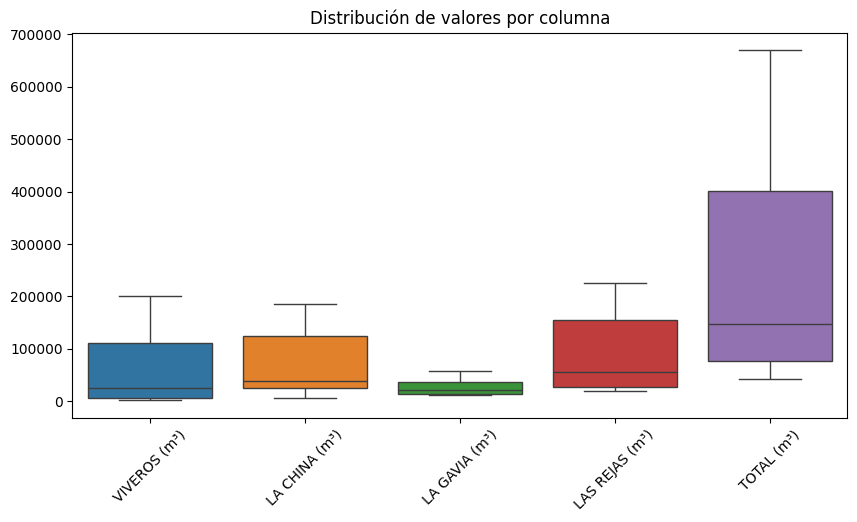

In [86]:
# 2. Distribución de valores por columna
plt.figure(figsize=(10, 5))
sns.boxplot(data = agua2018)
plt.title("Distribución de valores por columna")
plt.xticks(rotation=45)
plt.show()

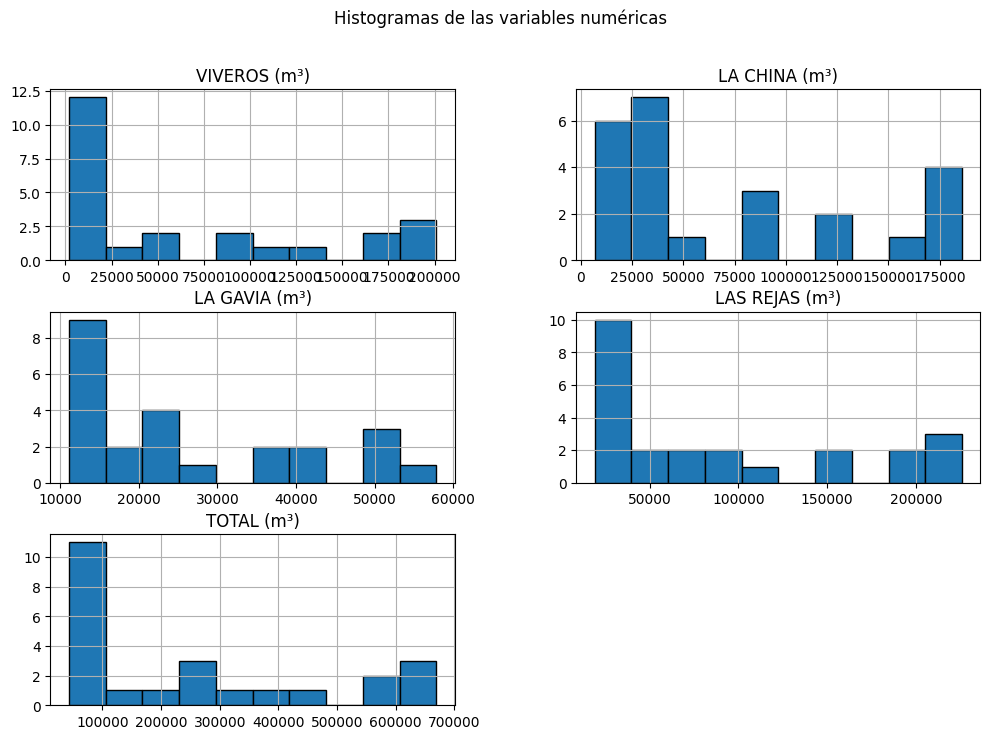

In [87]:
# 3. Histograma de cada columna
agua2018.hist(figsize=(12, 8), bins=10, edgecolor='black')
plt.suptitle("Histogramas de las variables numéricas")
plt.show()

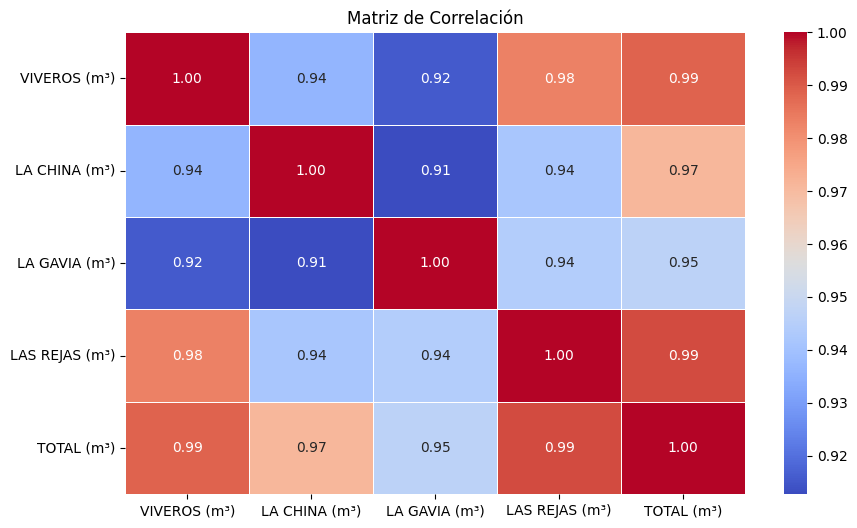

In [88]:
# 4. Matriz de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(agua2018.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación")
plt.show()

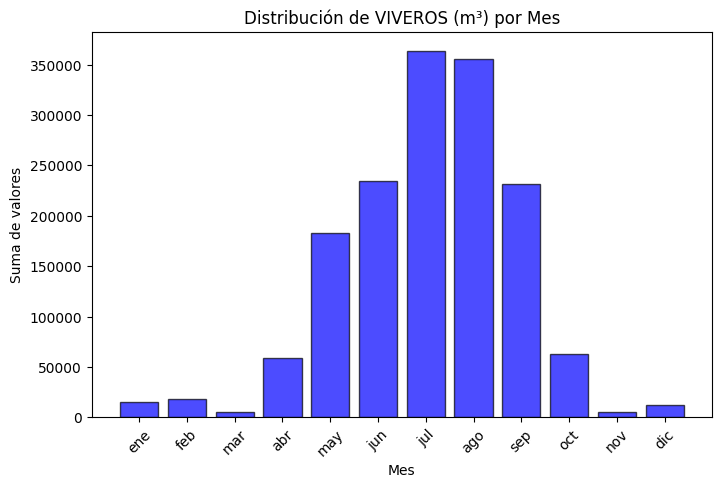

In [89]:
# Extraer los meses de los índices
agua2018["Mes"] = agua2018.index.str[:3]  # Extraer los primeros tres caracteres del índice (mes)
df_mes_viveros = agua2018.groupby("Mes")["VIVEROS (m³)"].sum()  # Sumar los valores por mes

# Ordenar los meses en el orden correcto
orden_meses = ["ene", "feb", "mar", "abr", "may", "jun", "jul", "ago", "sep", "oct", "nov", "dic"]
df_mes_viveros = df_mes_viveros.reindex(orden_meses)

# Generar el gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(df_mes_viveros.index, df_mes_viveros, color='blue', alpha=0.7, edgecolor='black')
plt.title("Distribución de VIVEROS (m³) por Mes")
plt.xlabel("Mes")
plt.ylabel("Suma de valores")
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

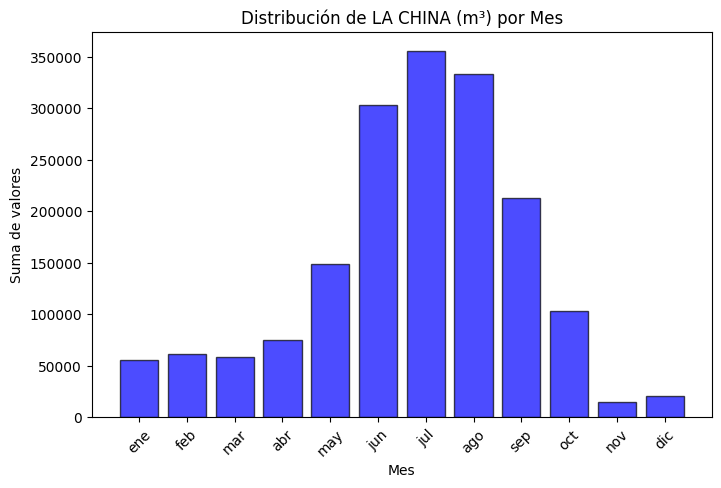

In [90]:
# Extraer los meses de los índices
agua2018["Mes"] = agua2018.index.str[:3]  # Extraer los primeros tres caracteres del índice (mes)
df_mes_china = agua2018.groupby("Mes")["LA CHINA (m³)"].sum()  # Sumar los valores por mes

# Ordenar los meses en el orden correcto
orden_meses = ["ene", "feb", "mar", "abr", "may", "jun", "jul", "ago", "sep", "oct", "nov", "dic"]
df_mes_china = df_mes_china.reindex(orden_meses)

# Generar el gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(df_mes_viveros.index, df_mes_china, color='blue', alpha=0.7, edgecolor='black')
plt.title("Distribución de LA CHINA (m³) por Mes")
plt.xlabel("Mes")
plt.ylabel("Suma de valores")
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

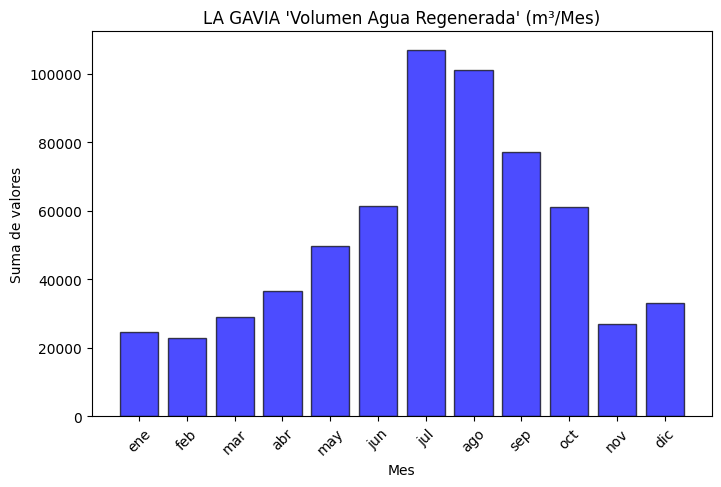

In [92]:
agua2018["Mes"] = agua2018.index.str[:3]  # Extraer los primeros tres caracteres del índice (mes)
df_mes_gavia = agua2018.groupby("Mes")["LA GAVIA (m³)"].sum()  # Sumar los valores por mes

orden_meses = ["ene", "feb", "mar", "abr", "may", "jun", "jul", "ago", "sep", "oct", "nov", "dic"]
df_mes_gavia = df_mes_gavia.reindex(orden_meses)
# Generar el histograma
plt.figure(figsize=(8, 5))
plt.bar(df_mes_gavia.index, df_mes_gavia, color='blue', alpha=0.7, edgecolor='black')
plt.title("LA GAVIA 'Volumen Agua Regenerada' (m³/Mes)")
plt.xlabel("Mes")
plt.ylabel("Suma de valores")
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

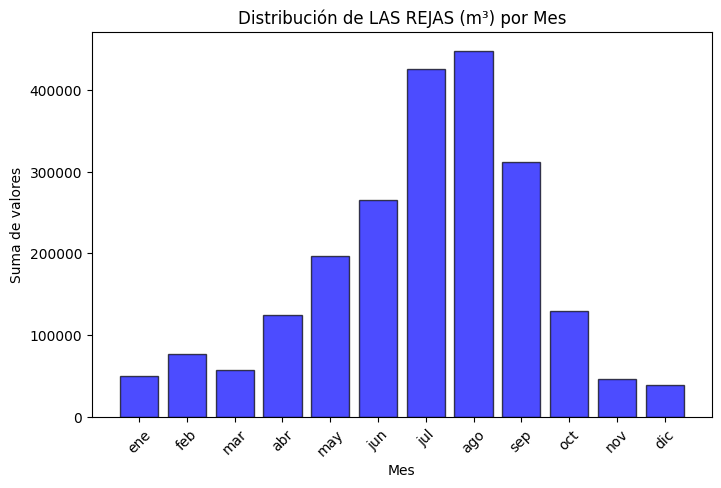

In [91]:
# Extraer los meses de los índices
agua2018["Mes"] = agua2018.index.str[:3]  # Extraer los primeros tres caracteres del índice (mes)
df_mes_rejas = agua2018.groupby("Mes")["LAS REJAS (m³)"].sum()  # Sumar los valores por mes

# Ordenar los meses en el orden correcto
orden_meses = ["ene", "feb", "mar", "abr", "may", "jun", "jul", "ago", "sep", "oct", "nov", "dic"]
df_mes_rejas = df_mes_rejas.reindex(orden_meses)

# Generar el gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(df_mes_rejas.index, df_mes_rejas, color='blue', alpha=0.7, edgecolor='black')
plt.title("Distribución de LAS REJAS (m³) por Mes")
plt.xlabel("Mes")
plt.ylabel("Suma de valores")
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

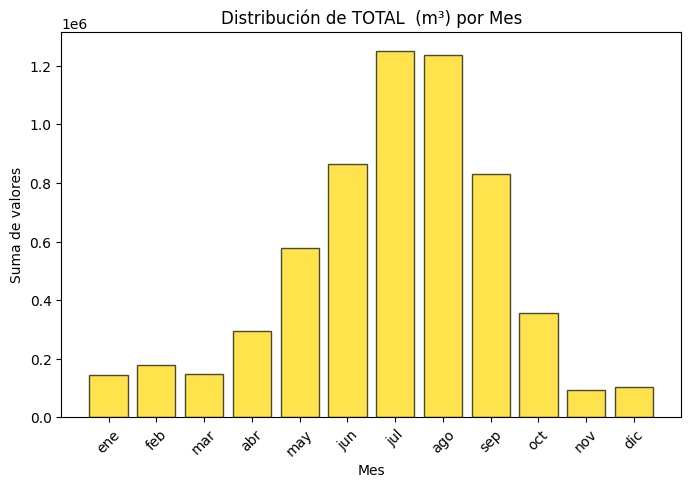

In [93]:
# Extraer los meses de los índices
agua2018["Mes"] = agua2018.index.str[:3]  # Extraer los primeros tres caracteres del índice (mes)
df_mes_total = agua2018.groupby("Mes")["TOTAL (m³)"].sum()  # Sumar los valores por mes

# Ordenar los meses en el orden correcto
orden_meses = ["ene", "feb", "mar", "abr", "may", "jun", "jul", "ago", "sep", "oct", "nov", "dic"]
df_mes_total = df_mes_total.reindex(orden_meses)

# Generar el gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(df_mes_total.index, df_mes_total, color='gold', alpha=0.7, edgecolor='black')
plt.title("Distribución de TOTAL  (m³) por Mes")
plt.xlabel("Mes")
plt.ylabel("Suma de valores")
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

## Conclusión 
podemos concluir que de forma general, con el aumento de temeperatura, desde la llegada de la primavera aumenta el consumo de agua, y disminuye al empezar el otoño.

